In [1]:
import matplotlib.pyplot as ptl
import pandas as pd
import numpy as np

In [2]:
#LOADING DATASET
df=pd.read_csv('/home/student/Documents/DSML ABIN/Sample Files/FuelConsumption.csv')
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [3]:
##Lets Select features that we want to use for regression.
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [4]:
#Extracting independent and dependent variable
x=cdf.iloc[:, :-1].values
y=cdf.iloc[:, -1].values
print(x)
print("\n")
print(y)

[[ 2.   4.   9.9  6.7  8.5]
 [ 2.4  4.  11.2  7.7  9.6]
 [ 1.5  4.   6.   5.8  5.9]
 ...
 [ 3.   6.  13.4  9.8 11.8]
 [ 3.2  6.  12.9  9.3 11.3]
 [ 3.2  6.  14.9 10.2 12.8]]


[196 221 136 ... 271 260 294]


<AxesSubplot:>

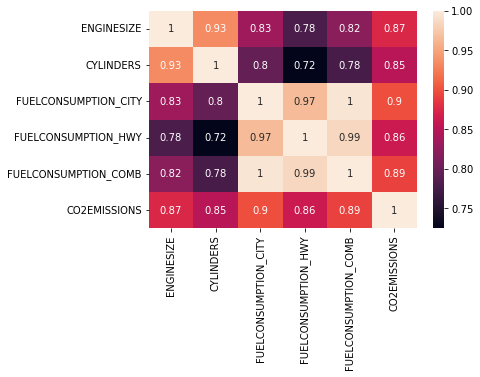

In [5]:
#Check the correlation between the independent and dependent variables
import seaborn as sns
sns.heatmap(cdf.corr(),annot=True)

In [6]:
# Splitting into traiing data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
# Fitting the MLR model to the training set:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
#Predicting the test set result
y_pred=regressor.predict(x_test)
#Predicting training set result
x_pred=regressor.predict(x_train)

In [9]:
#finding regression coefficients
print("Coefficients:",regressor.coef_)
print(regressor.intercept_)

Coefficients: [ 11.86807923   7.63313163 -12.72250735 -10.09435798  31.96237771]
68.10625867979522


In [10]:
#Performance Evaluation
print("Residual sum squares:%.2f" %np.mean((y_pred-y_test)**2))

Residual sum squares:597.46


In [11]:
print(regressor.score(x_test,y_test))

0.8533982543025491


<AxesSubplot:>

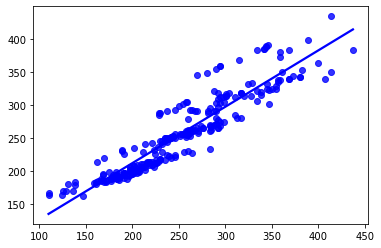

In [12]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='b')